In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({"Alter": [22,18,26,28,16,19,20,23,60,81], 
                   "Vorname": ["Peter", "Alois", "Martin", "Günter", "Bert", "Eva", "Nina", "Helga", "Anna", "Adele"],
                   "Nachname": ["Müller", "Bauer", "Kampt", "Gätze", "Brot", "Tischler", "Weiß", "Acker", "Eiche", "Grün"],
                   "Geschlecht": ["m","m","m","m","m","w","w","w","w","w"],
                   "Stadt": ["Köln", "München", "München", "Bamberg", "Bamberg", "Köln", "Bamberg", "Bamberg", "Köln", "Waldsassen"],
                   "Straße": ["Langer Weg", "Hohengasse", "Hohengasse", "Kirschweg", "Rotengasse", "Langer Weg", "Zöllner Straße", "Langer Weg", "Uferweg", "Lodermühlweg"],
                   "Gehalt p.a.": [40000,38500,37000,50000,90000,150000,50000,30000,25000,15000]})

In [4]:
df.groupby("Stadt").mean()

,Alter,Gehalt p.a.
Stadt,,
Bamberg,21.750000,55000.000000
Köln,33.666667,71666.666667
München,22.000000,37750.000000
Waldsassen,81.000000,15000.000000


In [7]:
df.groupby(["Stadt","Straße"]).count()

Alter  Vorname  Nachname  Geschlecht  Gehalt p.a.
Stadt      Straße                                                           
Bamberg    Kirschweg           1        1         1           1            1
           Langer Weg          1        1         1           1            1
           Rotengasse          1        1         1           1            1
           Zöllner Straße      1        1         1           1            1
Köln       Langer Weg          2        2         2           2            2
           Uferweg             1        1         1           1            1
München    Hohengasse          2        2         2           2            2
Waldsassen Lodermühlweg        1        1         1           1            1

In [9]:
pv_df = df.pivot_table(values=["Alter","Gehalt p.a."],
                       index=["Geschlecht","Stadt", "Straße"],
                       aggfunc={"Alter": [np.mean, lambda x: len(x)], "Gehalt p.a.": [np.sum, np.mean]})
pv_df.rename(columns={"<lambda>": "Count", "mean": "Mean", "sum":"Sum"}, inplace=True)
pv_df

Alter      Gehalt p.a.        
                                     Count Mean        Mean     Sum
Geschlecht Stadt      Straße                                       
m          Bamberg    Kirschweg          1   28       50000   50000
                      Rotengasse         1   16       90000   90000
           Köln       Langer Weg         1   22       40000   40000
           München    Hohengasse         2   22       37750   75500
w          Bamberg    Langer Weg         1   23       30000   30000
                      Zöllner Straße     1   20       50000   50000
           Köln       Langer Weg         1   19      150000  150000
                      Uferweg            1   60       25000   25000
           Waldsassen Lodermühlweg       1   81       15000   15000

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text xticklabel objects>)

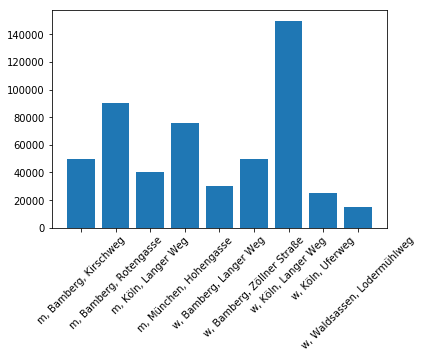

In [135]:
pv_df.loc[("m")].index
x = [", ".join(level[:]) for level in pv_df.index]
s = pv_df["Gehalt p.a."]["Sum"].tolist()
m = pv_df["Gehalt p.a."]["Mean"].tolist()
plt.bar(x=x, height=s)
plt.xticks(rotation=45)

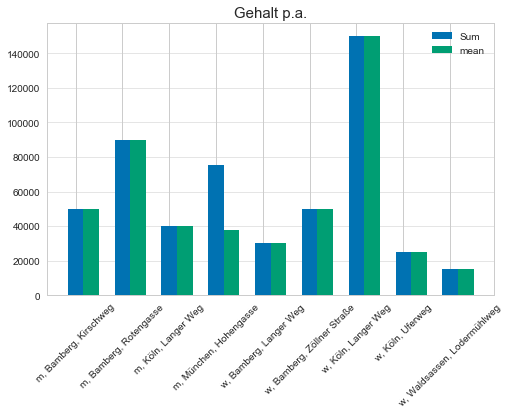

In [177]:
plt.style.use("seaborn-notebook")
indices = range(len(x))
width = np.min(np.diff(indices))/3
fig, ax = plt.subplots(figsize=(8,5))

plt.grid(axis="y", alpha=.5)
ax.bar(indices-width/2., s, width)
ax.bar(indices+width/2., m, width)

plt.xticks(indices-width/2., x, rotation=45)
plt.legend(["Sum", "mean"])
plt.title("Gehalt p.a.", fontsize=15)
# plt.savefig(r"C:\Users\JC Jones\Desktop\Pivot.png")

plt.show()

In [44]:
df.groupby(["Geschlecht","Stadt","Straße"])["Alter"].apply(np.mean, axis=1)

Geschlecht  Stadt       Straße           
m           Bamberg     Kirschweg       3    25014.0
                        Rotengasse      4    45008.0
            Köln        Langer Weg      0    20011.0
            München     Hohengasse      1    19259.0
                                        2    18513.0
w           Bamberg     Langer Weg      7    15011.5
                        Zöllner Straße  6    25010.0
            Köln        Langer Weg      5    75009.5
                        Uferweg         8    12530.0
            Waldsassen  Lodermühlweg    9     7540.5
dtype: float64

In [67]:
dft = df.set_index(["Geschlecht","Vorname"])
dft

Alter  Nachname       Stadt          Straße  Gehalt p.a.
Geschlecht Vorname                                                          
m          Peter       22    Müller        Köln      Langer Weg        40000
           Alois       18     Bauer     München      Hohengasse        38500
           Martin      26     Kampt     München      Hohengasse        37000
           Günter      28     Gätze     Bamberg       Kirschweg        50000
           Bert        16      Brot     Bamberg      Rotengasse        90000
w          Eva         19  Tischler        Köln      Langer Weg       150000
           Nina        20      Weiß     Bamberg  Zöllner Straße        50000
           Helga       23     Acker     Bamberg      Langer Weg        30000
           Anna        60     Eiche        Köln         Uferweg        25000
           Adele       81      Grün  Waldsassen    Lodermühlweg        15000

In [68]:
dft.loc[("m","Peter")]

Alter                  22
Nachname           Müller
Stadt                Köln
Straße         Langer Weg
Gehalt p.a.         40000
Name: (m, Peter), dtype: object

In [119]:
df["Nachname"].str.endswith("ot")

0    False
1    False
2    False
3    False
4     True
5    False
6    False
7    False
8    False
9    False
Name: Nachname, dtype: bool

In [120]:
df["Name"] = df["Vorname"] + " " + df["Nachname"]
df = df.reindex(["Name", "Vorname", "Nachname","Alter", "Geschlecht", "Stadt", "Gehalt p.a."],axis=1)
df

,Name,Vorname,Nachname,Alter,Geschlecht,Stadt,Gehalt p.a.
0,Peter Müller,Peter,Müller,22,m,Köln,40000
1,Alois Bauer,Alois,Bauer,18,m,München,38500
2,Martin Kampt,Martin,Kampt,26,m,München,37000
3,Günter Gätze,Günter,Gätze,28,m,Bamberg,50000
4,Bert Brot,Bert,Brot,16,m,Bamberg,90000
5,Eva Tischler,Eva,Tischler,19,w,Köln,150000
6,Nina Weiß,Nina,Weiß,20,w,Bamberg,50000
7,Helga Acker,Helga,Acker,23,w,Bamberg,30000
8,Anna Eiche,Anna,Eiche,60,w,Köln,25000
9,Adele Grün,Adele,Grün,81,w,Waldsassen,15000


In [121]:
def newcol(df, splitcol, colname1, colname2):
    new =  df["Name"].str.split(" ",expand=True)
    df[colname1], df[colname2] = new[0], new[1]
    
newcol(df, "Name", "VNameX", "NNameY")
df.head()

,Name,Vorname,Nachname,Alter,Geschlecht,Stadt,Gehalt p.a.,VNameX,NNameY
0,Peter Müller,Peter,Müller,22,m,Köln,40000,Peter,Müller
1,Alois Bauer,Alois,Bauer,18,m,München,38500,Alois,Bauer
2,Martin Kampt,Martin,Kampt,26,m,München,37000,Martin,Kampt
3,Günter Gätze,Günter,Gätze,28,m,Bamberg,50000,Günter,Gätze
4,Bert Brot,Bert,Brot,16,m,Bamberg,90000,Bert,Brot


In [118]:
df[df["Alter"]<23]

,Alter,Vorname,Nachname,Geschlecht,Stadt,Straße,Gehalt p.a.
0,22,Peter,Müller,m,Köln,Langer Weg,40000
1,18,Alois,Bauer,m,München,Hohengasse,38500
4,16,Bert,Brot,m,Bamberg,Rotengasse,90000
5,19,Eva,Tischler,w,Köln,Langer Weg,150000
6,20,Nina,Weiß,w,Bamberg,Zöllner Straße,50000
